### Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier 
import warnings
import pickle
import random

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

### Defining Functions

In [108]:
# Function for EDA
def DataExp(df, target_variable):
    print(f" Viewing df: \n\n{df.head()} \n\n------------------------------")
    print(f" Rows & Columns: {df.shape} \n\n------------------------------")
    print(f"Dimension: {df.ndim} \n\n------------------------------")
    print(f"dftypes: \n\n{df.dtypes} \n\n------------------------------")
    print(f"Null Values: \n\n{df.isna().sum()} \n\n------------------------------")
    print(f"Duplicates: \n\n{df.duplicated().sum()} \n\n------------------------------")
    print(f"No Of Unique Values: \n\n{df.apply(lambda x: x.nunique())}\n\n------------------------------")
    print(f"Unique Values \n\n{df.apply(lambda x: x.unique())} \n\n-----------------------------")
    print("df Summary")
    print()
    print(df.info())
    print("------------------------------\n")
    print("Checking Outliers")
    print()
    NumericalCols = df.select_dtypes(include= "number").columns
    NumCols = len(NumericalCols)

    fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize= (20, 5))
    axes = axes.flatten()

    for i, dafa in enumerate(NumericalCols):
        sns.boxplot(x= df[dafa], ax= axes[i])

    plt.tight_layout()

    plt.show()
    print("------------------------------\n")
#     print(f"Categorical variables description: \n\n{df.select_dtypes(include= 'object').describe().T}")
    print(f"Checking for {target_variable} distibution:")
    # df[target_variable].value_counts
    # sns.barplot(y=df[target_variable].value_counts().index, x=df[target_variable].value_counts().values, orient= "h")
    df[target_variable].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title(f'Pie Chart of {target_variable}')
    plt.show()
    
    print("------------------------------\n")
    print("Correlation between different variables")
    plt.figure(figsize= (20, 5))
    sns.heatmap(df.corr(), annot= True)
    plt.show()
    print("------------------------------\n")
    print(f"Continous variables description: \n\n{df.select_dtypes(include= 'number').describe().T.applymap(lambda x: format(x, '.2f'))}")    
    

In [109]:
# # # Create a bar plot
# plt.figure(figsize= (10, 10))
# plt.subplot(1, 2, 2)
# sns.barplot(y=DiaData["Outcome"].value_counts().index, x=DiaData["Outcome"].value_counts().values, orient= "h")

# plt.subplot(1, 2, 2)
# DiaData["Outcome"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Pie Chart of Outcome')
# plt.show()

In [110]:
# DiaData["Outcome"].value_counts().plot(kind = "pie")


In [111]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set up the figure with 1 row, 2 columns
# plt.figure(figsize=(12, 6))

# # Create the first subplot (left side) for barplot
# plt.subplot(1, 2, 1)
# sns.barplot(y=DiaData["Outcome"].value_counts().index, x=DiaData["Outcome"].value_counts().values, orient="h")
# plt.title('Bar Plot of Outcome')

# # Create the second subplot (right side) for pie chart
# plt.subplot(1, 2, 2)
# DiaData["Outcome"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Pie Chart of Outcome')

# # Show the plots
# plt.tight_layout()  # To make sure plots are spaced well
# plt.show()


In [112]:
# sns.plot(DiaData["Outcome"].value_counts())

In [113]:
# DiaData.columns

In [114]:
# Function for removing outliers
def OutlierTreat(column):
    if column.dtype in [float, int] :
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr

        column = column.clip(lower= lc, upper= uc)
        return column

#### Importing Data

In [115]:
DiaData = pd.read_csv(r"D:\Projects\Real MLOps project\Diabetes-Prediction\diabetes.csv")

#### EDA

 Viewing df: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

------------------------------
 Rows & Columns: (768, 9) 

------------------------------
Dimension: 2 

------------------------------
dftypes: 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 i

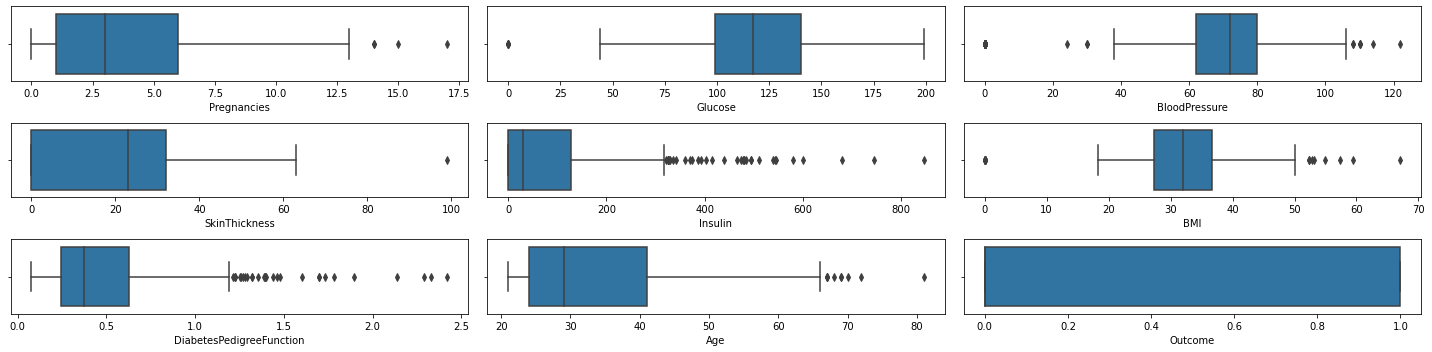

------------------------------

Checking for Outcome distibution:


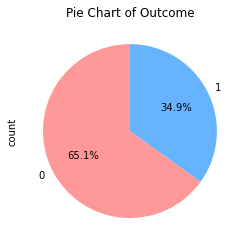

------------------------------

Correlation between different variables


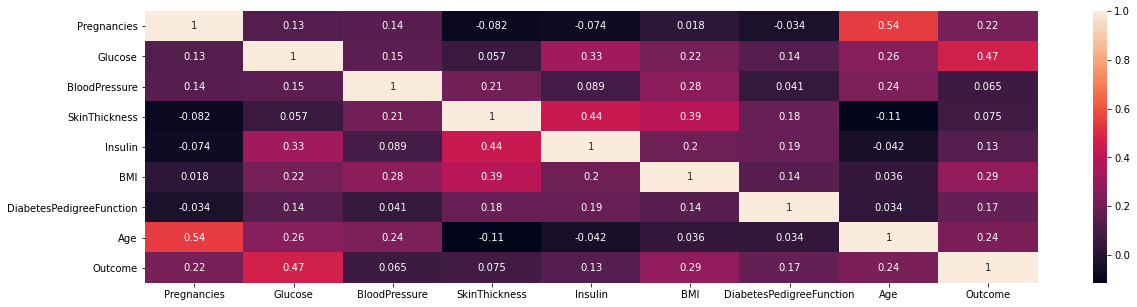

------------------------------

Continous variables description: 

                           count    mean     std    min    25%     50%  \
Pregnancies               768.00    3.85    3.37   0.00   1.00    3.00   
Glucose                   768.00  120.89   31.97   0.00  99.00  117.00   
BloodPressure             768.00   69.11   19.36   0.00  62.00   72.00   
SkinThickness             768.00   20.54   15.95   0.00   0.00   23.00   
Insulin                   768.00   79.80  115.24   0.00   0.00   30.50   
BMI                       768.00   31.99    7.88   0.00  27.30   32.00   
DiabetesPedigreeFunction  768.00    0.47    0.33   0.08   0.24    0.37   
Age                       768.00   33.24   11.76  21.00  24.00   29.00   
Outcome                   768.00    0.35    0.48   0.00   0.00    0.00   

                             75%     max  
Pregnancies                 6.00   17.00  
Glucose                   140.25  199.00  
BloodPressure              80.00  122.00  
SkinThickness       

In [116]:
DataExp(DiaData, "Outcome")

#### Data Pre-Processing

##### Treating Noise:
- We have 0s in some columns which dont make sense, so we will replace 0s with np.nan or null values and later impute them with central dencies


In [117]:
for i in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    DiaData.loc[DiaData[i] == 0, i] = np.nan

##### Treating Missings

In [118]:
knn_inpute = KNNImputer(n_neighbors= 5, weights= "distance")

DiaData = pd.DataFrame(knn_inpute.fit_transform(DiaData), columns= DiaData.columns)

In [119]:
DiaData.select_dtypes('number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [120]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    q1 = DiaData[i].quantile(0.25)
    q3 = DiaData[i].quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5 * iqr
    uc = q3 + 1.5 * iqr

    DiaData[i] = DiaData[i].clip(lower= lc, upper= uc)


 Viewing df: 

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  165.941157  33.6   
1          1.0     85.0           66.0      29.000000   60.705334  26.6   
2          8.0    183.0           64.0      26.111667  172.186312  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     1.200  33.0      1.0   

------------------------------
 Rows & Columns: (768, 9) 

------------------------------
Dimension: 2 

------------------------------
dftypes: 

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThi

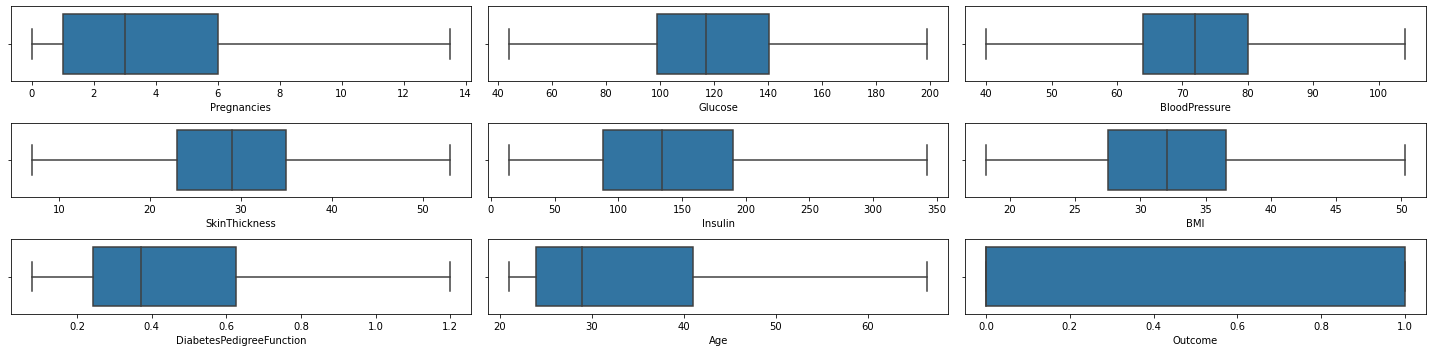

------------------------------

Checking for Outcome distibution:


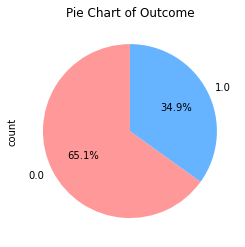

------------------------------

Correlation between different variables


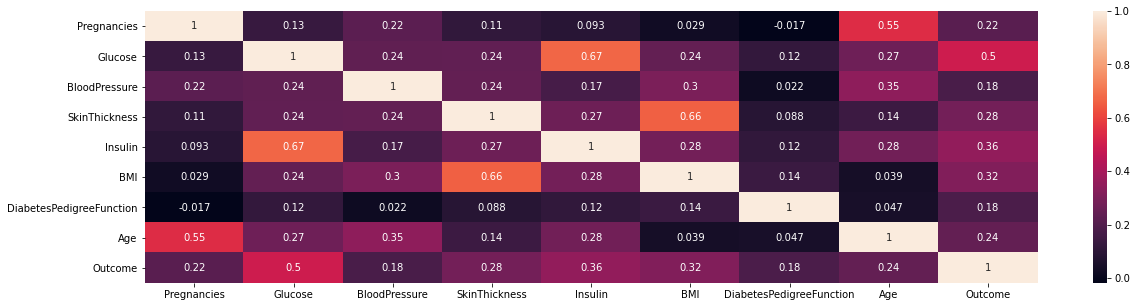

------------------------------

Continous variables description: 

                           count    mean    std    min    25%     50%     75%  \
Pregnancies               768.00    3.84   3.34   0.00   1.00    3.00    6.00   
Glucose                   768.00  121.59  30.51  44.00  99.00  117.00  140.25   
BloodPressure             768.00   72.35  11.81  40.00  64.00   72.00   80.00   
SkinThickness             768.00   29.03   9.06   7.00  23.00   29.00   35.00   
Insulin                   768.00  148.01  79.76  14.00  88.00  133.93  189.91   
BMI                       768.00   32.37   6.68  18.20  27.50   32.06   36.60   
DiabetesPedigreeFunction  768.00    0.46   0.29   0.08   0.24    0.37    0.63   
Age                       768.00   33.20  11.63  21.00  24.00   29.00   41.00   
Outcome                   768.00    0.35   0.48   0.00   0.00    0.00    1.00   

                             max  
Pregnancies                13.50  
Glucose                   199.00  
BloodPressure    

In [121]:
DataExp(DiaData, "Outcome")

##### Defining X and y 

In [122]:
X = DiaData.drop(columns= "Outcome")
y = DiaData["Outcome"]

##### Scaling Variables

In [123]:
StdScale = StandardScaler()
X = pd.DataFrame(StdScale.fit_transform(X), columns= X.columns)

In [124]:
DiaData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,165.941157,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,60.705334,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.111667,172.186312,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1.0


#### Splitting Data into Train and Test

In [125]:
X_train, X_test,y_train, y_test =  train_test_split(X, y, test_size=.4, random_state= 42)

In [126]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((460, 8), (460,), (308, 8), (308,))

#### Balancing the Data

In [127]:
smote = SMOTE(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Model Training and Testing

In [128]:
# Function to see the accuracy model wise 

def BestAlgorithm(Xtrain, Xtest, Ytrain, Ytest):
    models = {
        "Logistic Regression": (LogisticRegression(), {
            'fit_intercept': [True, False]}),


       "Decision Tree": (DecisionTreeClassifier(random_state= 42), {
            'max_depth': [None, 5, 10, 20, 30],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]}),

        "Random Forest": (RandomForestClassifier(random_state= 42), {
            "n_estimators": np.arange(50, 200, 5), 
            "max_depth": np.arange(1, 10, 1), 
            "max_features": ["auto", "sqrt", "log2", 0.2, 0.5],
            "min_samples_leaf": np.arange(2, 10, 1),
            "min_samples_split": np.arange(2, 10, 1)})
        ,
        
        "SVM": (SVC(), {
            'C': np.linspace(0.01, 10, num=10),
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}),

        

        }

    results= []

    for name, (model, params) in models.items():
        RandSearch = RandomizedSearchCV(estimator= model, 
                                        param_distributions= params)
        RandSearch.fit(Xtrain, Ytrain)
        BestParams = RandSearch.best_params_
        TrainingBestScore = RandSearch.best_score_
        
        if name == "Logistic Regression":
            TestingBestScore= accuracy_score(Ytest, LogisticRegression(**RandSearch.best_params_).fit(Xtrain, Ytrain).predict(Xtest))

        elif name == "Decision Tree":
            TestingBestScore= accuracy_score(Ytest, DecisionTreeClassifier(**RandSearch.best_params_).fit(Xtrain, Ytrain).predict(Xtest))
        
        elif name == "Random Forest":
            TestingBestScore= accuracy_score(Ytest, RandomForestClassifier(**RandSearch.best_params_).fit(Xtrain, Ytrain).predict(Xtest))
    
        else:
            TestingBestScore= accuracy_score(Ytest, SVC(**RandSearch.best_params_).fit(Xtrain, Ytrain).predict(Xtest))

        results.append({"Model": name, 
                        "Best Parametres": BestParams, 
                        "Training Accuracy": TrainingBestScore,
                        "Test Accuracy": TestingBestScore,
                        "Difference": TestingBestScore - TrainingBestScore})
    results_df = pd.DataFrame(results)         
    return results_df


In [129]:
result_df = BestAlgorithm(X_train_smote, X_test, y_train_smote, y_test)

In [130]:
result_df

,Model,Best Parametres,Training Accuracy,Test Accuracy,Difference
0,Logistic Regression,{'fit_intercept': False},0.767072,0.724026,-0.043046
1,Decision Tree,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.797827,0.704545,-0.093282
2,Random Forest,"{'n_estimators': 190, 'min_samples_split': 7, ...",0.804505,0.743506,-0.060999
3,SVM,"{'kernel': 'rbf', 'gamma': 1, 'C': 2.23}",0.826684,0.685065,-0.141619


In [131]:
BestModel = LogisticRegression(**result_df.loc[result_df.Model == "Logistic Regression", "Best Parametres"].values[0], random_state= 42)
BestModel.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=42)

#### Predicting train and test values

In [132]:
TrainPred = BestModel.predict(X_train)
TestPred = BestModel.predict(X_test)

print(accuracy_score(y_train, TrainPred), accuracy_score(y_test, TestPred))
print(confusion_matrix(y_train, TrainPred))
print(confusion_matrix(y_test, TestPred))

0.7478260869565218 0.7207792207792207
[[209  85]
 [ 31 135]]
[[141  65]
 [ 21  81]]


In [133]:
filename = "LR_BestModel_Diabetes.pkl"
pickle.dump(BestModel, open(filename, "wb"))

In [134]:
# from collections import Counter

# print("Before SMOTE:", Counter(y_train))
# print("After SMOTE:", Counter(y_train_smote))


In [92]:
y_train.shape

(460,)

In [93]:
y_train_smote.shape

(588,)